## 머신러닝/딥러닝 : 데이터의 법칙성을 추출
     - 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단, 얼굴식별, etc....   
     - 지도학습(회귀, 분류) vs 비지도학습(군집) vs 강화학습(게임)
     
- 1. 데이터 확보 및 생성 (inputdata, outputdata)
- 2. 데이터 전처리 (결측치, 스케일조정, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류...)
- 3. 모델 구성
- 4. 모델 학습 과정 설정 (손실함수, 옵티마이저, 평가지표)
- 5. 모델 학습시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 평가 (모델 저장 후, 저장된 모델을 이용하여, 입력값이 주어지면 예측값 받기)

# 1. 데이터 셋 생성
# 2. 데이터 전처리

In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input # 모델에 레이어 추가시 

In [3]:
# 학습데이터 == 훈련데이터
X_train = np.array([1,2,3,4,5,6,7,8,9]*10)
Y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
X_val = np.array([1,2,3,4,5,6,7,8,9])
Y_val = np.array([2,4,6,8,10,12,14,16,18])

In [4]:
# 분류분석을 위한 인코딩 종류
data = np.array(['a','b','b','b','c'])
print('1. 원 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('2. 라벨 인코딩 된 데이터 :', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('3. 원핫인코딩된 데이터(keras) :\n', one_hot_encoding_data)

1. 원 데이터 : ['a' 'b' 'b' 'b' 'c']
2. 라벨 인코딩 된 데이터 : [0 1 1 1 2]
3. 원핫인코딩된 데이터(keras) :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [5]:
# 분류분석을 위한 원핫인코딩 방법
data = np.array([1,2,2,3,9])
print('원 데이터 :', data)
categorical_one_hot = to_categorical(data) # 0이없는데도 0이생성 제일 큰수안에 빈수가있어도 생성
print('to_categorical을 이용한 원 핫 인코딩(넘파이배열)\n', categorical_one_hot)
import pandas as pd
display('get_dummies를 이용한 원핫인코딩(데이터프레임)\n', pd.get_dummies(data))

원 데이터 : [1 2 2 3 9]
to_categorical을 이용한 원 핫 인코딩(넘파이배열)
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


'get_dummies를 이용한 원핫인코딩(데이터프레임)\n'

,1,2,3,9
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


In [7]:
Y_train, Y_val

(array([ 2,  4,  6,  8, 10, 12, 14, 16, 18,  2,  4,  6,  8, 10, 12, 14, 16,
        18,  2,  4,  6,  8, 10, 12, 14, 16, 18,  2,  4,  6,  8, 10, 12, 14,
        16, 18,  2,  4,  6,  8, 10, 12, 14, 16, 18,  2,  4,  6,  8, 10, 12,
        14, 16, 18,  2,  4,  6,  8, 10, 12, 14, 16, 18,  2,  4,  6,  8, 10,
        12, 14, 16, 18,  2,  4,  6,  8, 10, 12, 14, 16, 18,  2,  4,  6,  8,
        10, 12, 14, 16, 18]),
 array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]))

In [8]:
# 분류분석을 위해 종속변수(target변수)를 원핫인코딩
Y_train = to_categorical(Y_train, 19)
Y_val = to_categorical(Y_val)

In [9]:
Y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [12]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

In [15]:
X_train[:2]

array([1, 2])

In [16]:
Y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

# 3. 모델 구성

In [18]:
model = Sequential()
model.add(Input(shape=(1,)))
# Dense(출력, 입력)
model.add(Dense(units=38, activation='sigmoid'))   # units : 출력갯수, activation(활성화함수)
model.add(Dense(units=64, activation='elu'))       # units : 입력수는 2의n승 수
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))   #  activation='softmax' : 모든 출력의 합이 1
# 분류분석의 마지막 layer 에서 activation 함수로 사용
print(model.summary()) # 모델 파라미터 갯수 확인

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________
None


# 4. 모델 학습과정 설정
- 손실함수, 옵티마이저, 평가지표
    * loss='categorical_crossentropy' : 딥러닝 훈련시 다중분류분석에서의 손실함수
        - 모델의 예측 확률분호와 실제값의 확률 분포가 얼마나 다른지 계산
    * metrics=['accuracy'] : 정확도

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기

In [22]:
hist = model.fit(X_train, Y_train, # 훈련(학습)데이터
                 epochs=300, # 학습횟수
                 batch_size=10, # 가중치를 조정하는 단위
                verbose=2, # 0:출력없음, 1:진행상황만출력, 2:에포크별 로그메세지 출력
                validation_data=(X_val, Y_val) # 검증 데이터셋
                )

Epoch 1/300
9/9 - 1s - loss: 2.8416 - accuracy: 0.0889 - val_loss: 2.6672 - val_accuracy: 0.1111 - 1s/epoch - 114ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5942 - accuracy: 0.2000 - val_loss: 2.4980 - val_accuracy: 0.2222 - 61ms/epoch - 7ms/step
Epoch 3/300
9/9 - 0s - loss: 2.4584 - accuracy: 0.1889 - val_loss: 2.3799 - val_accuracy: 0.1111 - 63ms/epoch - 7ms/step
Epoch 4/300
9/9 - 0s - loss: 2.3465 - accuracy: 0.2000 - val_loss: 2.2798 - val_accuracy: 0.2222 - 70ms/epoch - 8ms/step
Epoch 5/300
9/9 - 0s - loss: 2.2489 - accuracy: 0.2222 - val_loss: 2.1878 - val_accuracy: 0.3333 - 66ms/epoch - 7ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1594 - accuracy: 0.3333 - val_loss: 2.1032 - val_accuracy: 0.3333 - 60ms/epoch - 7ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0841 - accuracy: 0.2667 - val_loss: 2.0241 - val_accuracy: 0.2222 - 65ms/epoch - 7ms/step
Epoch 8/300
9/9 - 0s - loss: 1.9951 - accuracy: 0.2556 - val_loss: 1.9503 - val_accuracy: 0.2222 - 64ms/epoch - 7ms/step
Epoch 9/300
9/9 - 0s - loss: 1.9

Epoch 69/300
9/9 - 0s - loss: 0.3231 - accuracy: 1.0000 - val_loss: 0.3062 - val_accuracy: 1.0000 - 60ms/epoch - 7ms/step
Epoch 70/300
9/9 - 0s - loss: 0.3024 - accuracy: 1.0000 - val_loss: 0.2938 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 71/300
9/9 - 0s - loss: 0.2970 - accuracy: 1.0000 - val_loss: 0.2831 - val_accuracy: 1.0000 - 54ms/epoch - 6ms/step
Epoch 72/300
9/9 - 0s - loss: 0.2834 - accuracy: 1.0000 - val_loss: 0.2737 - val_accuracy: 1.0000 - 54ms/epoch - 6ms/step
Epoch 73/300
9/9 - 0s - loss: 0.2950 - accuracy: 1.0000 - val_loss: 0.2696 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 74/300
9/9 - 0s - loss: 0.2732 - accuracy: 1.0000 - val_loss: 0.2681 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 75/300
9/9 - 0s - loss: 0.2618 - accuracy: 1.0000 - val_loss: 0.2531 - val_accuracy: 1.0000 - 60ms/epoch - 7ms/step
Epoch 76/300
9/9 - 0s - loss: 0.2507 - accuracy: 1.0000 - val_loss: 0.2363 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.0311 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 1.0000 - 54ms/epoch - 6ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 1.0000 - 54ms/epoch - 6ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0288 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 1.0000 - 59ms/epoch - 7ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 1.0000 - 54ms/epoch - 6ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0273 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.0261 - val_accuracy: 1.0000 - 58ms/epoch - 6ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000 - 59ms/epoch - 7ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000 - 61ms/epoch - 7ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000 - 60ms/epoch - 7ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000 - 58ms/epoch - 6ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000 - 59ms/epoch - 7ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000 - 58ms/epoch - 6ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000 - 52ms/epoch - 6ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000 - 58ms/epoch - 6ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000 - 120ms/epoch - 13ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000 - 62ms/epoch - 7ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000 - 58ms/epoch - 6ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000 - 61ms/epoch - 7ms/step
Epoch 278/300


# 6. 모델과정 평가하기
    - 학습과정 중 loss와 평가지표(accuracy)살펴보기, evalate함수

In [23]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

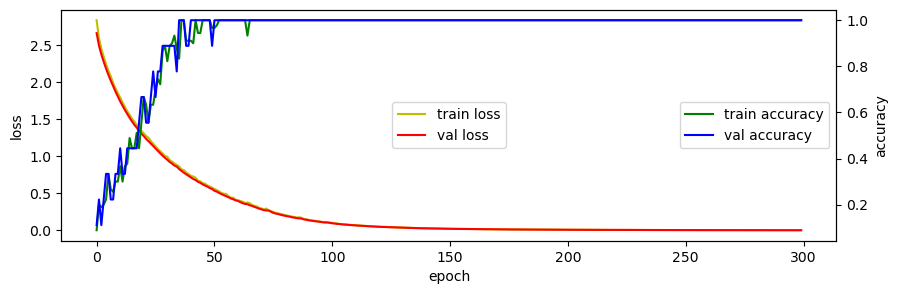

In [31]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10, 3))
loss_ax.plot(hist.history['loss'],'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

In [33]:
# 모델 평가하기
score = model.evaluate(X_val, Y_val, batch_size=3)

3/3 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000


In [34]:
score

[0.0023922021500766277, 1.0]

In [36]:
print('평가된 loss값 :', score[0])
print('평가된 accuracy :', score[1]*100, '%')

평가된 loss값 : 0.0023922021500766277
평가된 accuracy : 100.0 %


# 7. 모델 사용하기(모델을 사용해서 예측하기)

In [37]:
H = model.predict(np.array([4]))
H

1/1 [==============================] - 0s 82ms/step


array([[2.9229225e-23, 3.5845818e-19, 5.0603978e-18, 2.5277920e-17,
        1.3240271e-11, 1.8854338e-21, 1.0322084e-03, 1.2129570e-20,
        9.9780327e-01, 3.2998538e-19, 1.1644477e-03, 6.4687863e-20,
        3.3410070e-11, 5.4236364e-24, 8.0345323e-17, 6.2606235e-23,
        4.3732048e-38, 4.1346473e-21, 0.0000000e+00]], dtype=float32)

In [38]:
model.predict(np.array([4])).argmax()

1/1 [==============================] - 0s 18ms/step


8

In [39]:
# 몇%의 확률로 분류되었는지
H[0, H.argmax()]

0.9978033

# 7. 모델 저장하기

In [40]:
model.save('model/2_deep_begin.h5')

In [3]:
from tensorflow.keras.models import load_model
import numpy as np
model2 = load_model('model/2_deep_begin.h5')

In [4]:
H = model2.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 493ms/step


4

In [5]:
# 몇%의 확률로 분류되었는지
H[0, H.argmax()]

0.99835974

In [7]:
H[0, [2, 4, 6]]
# [round(val, 3) for val in H[0, [2,4,6]]] 퍼센트로 보기 쉽게 바꿀때

[0.001, 0.998, 0.001]